### Analyse digital signal using ANN

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
import matplotlib as plt
%matplotlib inline

data = pd.read_csv('./data/digital_signal.csv', header=None)
data.head()

local_kwargs {'data_path_1': './data/digital_signal.csv', 'data_path_2': '', 'data_path_3': '', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,1000,1001,1002
0,1.15,1.76,3.30,0.053353,0.052205,0.055634,0.067048,0.086576,0.111853,0.140554,...,0.306864,0.315905,0.325406,0.335135,0.344773,0.353994,0.362396,0.369342,0.373981,0.375535
1,1.17,1.74,3.40,0.453297,0.427421,0.394495,0.362371,0.334807,0.311793,0.292468,...,-0.041243,-0.046814,-0.051548,-0.055335,-0.058006,-0.059414,-0.059606,-0.058971,-0.058172,-0.057842
2,-1.00,1.83,2.65,-1.587962,-1.641788,-1.704360,-1.750264,-1.760649,-1.726626,-1.647636,...,0.551023,0.550246,0.548295,0.546575,0.545950,0.546594,0.548123,0.549880,0.551216,0.551684
3,1.13,1.80,3.42,0.045770,0.028587,0.012289,0.007296,0.019246,0.047922,0.089389,...,0.274071,0.271366,0.268214,0.264893,0.261571,0.258323,0.255252,0.252612,0.250798,0.250181
4,1.17,1.79,3.47,0.257473,0.247620,0.238914,0.237917,0.248194,0.269635,0.299925,...,0.610546,0.610244,0.609855,0.609638,0.609874,0.610760,0.612257,0.614007,0.615414,0.615925


In [2]:
X_data = data.iloc[:, 3:len(data.iloc[0])]
y_true = data.iloc[:, 0:3]

In [3]:
len(X_data), len(y_true)

(144, 144)

In [4]:
X_data.head()

,3,4,5,6,7,8,9,10,11,12,...,993,994,995,996,997,998,999,1000,1001,1002
0,0.053353,0.052205,0.055634,0.067048,0.086576,0.111853,0.140554,0.172179,0.207655,0.247373,...,0.306864,0.315905,0.325406,0.335135,0.344773,0.353994,0.362396,0.369342,0.373981,0.375535
1,0.453297,0.427421,0.394495,0.362371,0.334807,0.311793,0.292468,0.277528,0.269225,0.269538,...,-0.041243,-0.046814,-0.051548,-0.055335,-0.058006,-0.059414,-0.059606,-0.058971,-0.058172,-0.057842
2,-1.587962,-1.641788,-1.704360,-1.750264,-1.760649,-1.726626,-1.647636,-1.528610,-1.378626,-1.210769,...,0.551023,0.550246,0.548295,0.546575,0.545950,0.546594,0.548123,0.549880,0.551216,0.551684
3,0.045770,0.028587,0.012289,0.007296,0.019246,0.047922,0.089389,0.138790,0.191795,0.244516,...,0.274071,0.271366,0.268214,0.264893,0.261571,0.258323,0.255252,0.252612,0.250798,0.250181
4,0.257473,0.247620,0.238914,0.237917,0.248194,0.269635,0.299925,0.336621,0.378302,0.424298,...,0.610546,0.610244,0.609855,0.609638,0.609874,0.610760,0.612257,0.614007,0.615414,0.615925


In [5]:
y_true.head()

,0,1,2
0,1.15,1.76,3.30
1,1.17,1.74,3.40
2,-1.00,1.83,2.65
3,1.13,1.80,3.42
4,1.17,1.79,3.47


In [6]:
StartML.lookup_value(y_true, 0)  # so there's no response with 0ms

array([], dtype=float64)

In [7]:
# Idea: letting the value as -1 will affect negatively on the overall result. 
# since we know that the response always starts at minimal value >= 0ms
# Simple case: replace all value -1 by 0 
y_true.replace(to_replace=-1, value=0, inplace=True)
y_true.head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,0,1,2
0,1.15,1.76,3.30
1,1.17,1.74,3.40
2,0.00,1.83,2.65
3,1.13,1.80,3.42
4,1.17,1.79,3.47


In [8]:
# Normalizing data using MinMaxScaler in order to avoid the dominant feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_data)

X_data = pd.DataFrame(data=scaler.transform(X_data),
                      columns=X_data.columns,
                      index=X_data.index)

# normalize all the responses (not necessary)
# scaler.fit(y_true)
# y_true = pd.DataFrame(data=scaler.transform(y_true),
#                      columns=y_true.columns,
#                      index=y_true.index)

X_data.shape, y_true.shape

((144, 1000), (144, 3))

In [9]:
X_data.head()

,3,4,5,6,7,8,9,10,11,12,...,993,994,995,996,997,998,999,1000,1001,1002
0,0.112108,0.100403,0.079712,0.092354,0.153286,0.324706,0.513226,0.865051,0.902157,0.911379,...,0.683322,0.679526,0.678615,0.678968,0.681109,0.683170,0.685505,0.687202,0.690464,0.692009
1,0.121072,0.106058,0.084422,0.096039,0.157028,0.328122,0.516731,0.866836,0.902976,0.911665,...,0.623265,0.616096,0.612164,0.609725,0.609779,0.610056,0.611072,0.611899,0.614952,0.616725
2,0.075324,0.074870,0.055250,0.069680,0.125442,0.293298,0.471975,0.836234,0.881052,0.892511,...,0.725446,0.720507,0.717907,0.716464,0.716736,0.717232,0.718263,0.718943,0.721433,0.722609
3,0.111938,0.100047,0.079110,0.091609,0.152271,0.323614,0.512046,0.864485,0.901946,0.911342,...,0.677665,0.671738,0.668533,0.666512,0.666374,0.666250,0.666607,0.666679,0.668940,0.670233
4,0.116683,0.103348,0.082260,0.094486,0.155722,0.327402,0.516903,0.867837,0.904428,0.913668,...,0.735715,0.730999,0.728759,0.727647,0.728057,0.728581,0.729575,0.730217,0.732650,0.733768


In [10]:
# split data into training part and evaluation part
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(X_data, y_true, test_size=0.2, random_state = 101)
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

((115, 1000), (29, 1000), (115, 3), (29, 3))

In [11]:
# build neuron network with keras
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer with the number of units as same as input attributes
classifier.add(Dense(units = 1000, kernel_initializer='uniform', activation = 'relu', input_dim = 1000))

# Adding the second hidden layer with 500 neurons
classifier.add(Dense(units = 500, kernel_initializer='uniform', activation = 'relu'))

# Adding the third hidden layer with 500 neurons
classifier.add(Dense(units = 250, kernel_initializer='uniform', activation = 'relu'))

# Adding the output layer for 3 output-values
# No activation function is used for the output layer because it is a regression problem 
# to predict the numerical values directly without transform.
classifier.add(Dense(units = 3, kernel_initializer='uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)

# Evaluate the model
scores = classifier.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Epoch 1/100
115/115 [==============================] - 1s 9ms/step - loss: 2.2649 - acc: 0.7565
Epoch 2/100
115/115 [==============================] - 1s 5ms/step - loss: 1.2053 - acc: 0.8087
Epoch 3/100
115/115 [==============================] - 1s 5ms/step - loss: 1.0584 - acc: 0.8087
Epoch 4/100
115/115 [==============================] - 1s 5ms/step - loss: 1.1525 - acc: 0.8087
Epoch 5/100
115/115 [==============================] - 1s 6ms/step - loss: 1.2068 - acc: 0.8087
Epoch 6/100
115/115 [==============================] - 1s 5ms/step - loss: 1.1024 - acc: 0.8087
Epoch 7/100
115/115 [==============================] - 1s 5ms/step - loss: 1.0749 - acc: 0.8087
Epoch 8/100
115/115 [==============================] - 1s 6ms/step - loss: 1.0680 - acc: 0.8087
Epoch 9/100
115/115 [==============================] - 1s 5ms/step - loss: 1.0411 - acc: 0.8087
Epoch 10/100
115/115 [==============================] - 1s 5ms/step - loss: 1.0932 - acc: 0.8087
Epoch 11/100
115/115 [=================

In [13]:
# Number of Parameters= input_dim * units + units (bias)
# Layer dense_1: = 1000*1000+1000 = 1001000
# Layer dense_2: = 1000*500+500 = 500500
# Layer dense_3: = 500*250+250 = 125250
# Layer dense_4: = 250*3+3 = 753
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 753       
Total params: 1,627,503
Trainable params: 1,627,503
Non-trainable params: 0
_________________________________________________________________


In [14]:
# predict value with the splitted test (eval) data
y_pred = classifier.predict(x_eval)

# y_pred = np.round(y_pred, decimals=2)
# y_eval.values, y_pred
y_eval.shape, y_pred.shape

((29, 3), (29, 3))

In [15]:
# Plot value of y_eval and y_pred (need to convert y_pred into DataFrame)
type(y_eval), type(y_pred)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [16]:
y_eval.head()

,0,1,2
64,1.32,2.07,3.67
140,1.03,2.18,4.60
16,1.22,1.83,3.45
66,1.35,1.90,3.46
113,1.00,1.73,3.23


In [17]:
StartML.idx_reset(y_eval)
y_eval.head()

,0,1,2
0,1.32,2.07,3.67
1,1.03,2.18,4.60
2,1.22,1.83,3.45
3,1.35,1.90,3.46
4,1.00,1.73,3.23


In [18]:
y_pred = pd.DataFrame(data=y_pred, columns=y_eval.columns)
y_pred.head()

,0,1,2
0,0.658638,1.608662,3.584498
1,0.381561,0.945201,2.254932
2,0.621046,1.489402,3.231030
3,0.854857,1.960141,4.116591
4,0.547890,1.305962,3.035870


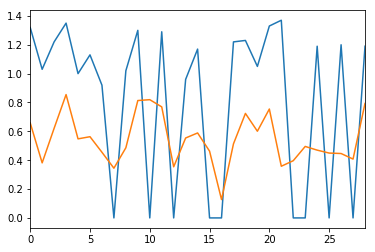

In [19]:
# compare the plot between first reponse of the predicted value and true value
y_eval[0].plot()
y_pred[0].plot()

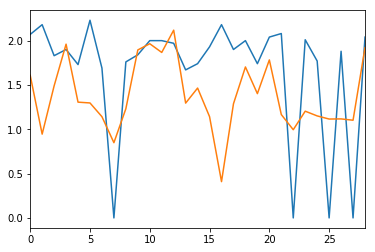

In [20]:
# compare the plot between second reponse of the predicted value and true value
y_eval[1].plot()
y_pred[1].plot()

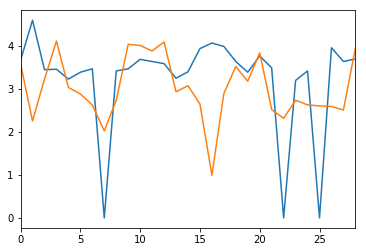

In [21]:
# compare the plot between third reponse of the predicted value and true value
y_eval[2].plot()
y_pred[2].plot()

### Improvement idea: 
#### We will replace the value -1 appearing in the responses with the following rules:

#### the first response y1 = mean of all other first responses
#### the second response y2 = mean of all other second responses
#### the third response y3 = mean of all other third responses